In [1]:
import pandas as pd

# Numpy
Numpy is a library for work with multidimensional arrays and it provides many useful functions for statistics and linear algebra calculations. It forms the foundation for many packages such as pandas, and is used through out the python ecosystem with keras to scikit-learn. The underlying code is implemented in C so it's much faster and memory-efficent than pure python.

In [2]:
import numpy as np

In [ ]:
# create a 2 by 2 array
a = np.array([  [1,2, 3],
                [3,2,1]     ])
a

In [ ]:
b = a+2
b


In [ ]:
c = a+b
c

In [ ]:
d = a*b
d

In [ ]:
z = a%b
z

In [3]:
import time

In [4]:
time.time() #when time started, until now, in seconds

1709370056.0819852

In [5]:
time.sleep(1)
print('sleeper')

sleeper


In [6]:
time.time()/(60*60*24*365) #start of time, divided by 60 mins, 60 hrs, 24 hrs/day, 365 days/year

54.203769112105405

In [7]:
time.strftime('%Y-%m-%d %H:%M', time.gmtime(time.time()))

'2024-03-02 09:01'

# Speed
Since we're calling C code, numpy is orders of magnitudes faster than python. The code below times creating and then squaring two lists of numbers, you can see that the numpy version is considerably faster.

In [8]:
L = list(range(1000))
%timeit [i**2 for i in L]

290 µs ± 8.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
a = np.arange(1000)
%timeit a**2

1.93 µs ± 621 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# DateTime in Pandas

In [10]:
dft = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.data', header=None)

In [11]:
dft = dft.iloc[:,:5]
dft.head(5)

,0,1,2,3,4
0,1/1/1998,0.8,1.8,2.4,2.1
1,1/2/1998,2.8,3.2,3.3,2.7
2,1/3/1998,2.9,2.8,2.6,2.1
3,1/4/1998,4.7,3.8,3.7,3.8
4,1/5/1998,2.6,2.1,1.6,1.4


In [12]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2536 non-null   object
 1   1       2536 non-null   object
 2   2       2536 non-null   object
 3   3       2536 non-null   object
 4   4       2536 non-null   object
dtypes: object(5)
memory usage: 99.2+ KB


In [13]:
dft.columns = ['date', 'col1', 'col2', 'col3', 'col4']
dft.head(2)

,date,col1,col2,col3,col4
0,1/1/1998,0.8,1.8,2.4,2.1
1,1/2/1998,2.8,3.2,3.3,2.7


In [14]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2536 non-null   object
 1   col1    2536 non-null   object
 2   col2    2536 non-null   object
 3   col3    2536 non-null   object
 4   col4    2536 non-null   object
dtypes: object(5)
memory usage: 99.2+ KB


In [15]:
dft['date'] = pd.to_datetime(dft['date'])
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2536 non-null   datetime64[ns]
 1   col1    2536 non-null   object        
 2   col2    2536 non-null   object        
 3   col3    2536 non-null   object        
 4   col4    2536 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 99.2+ KB


In [16]:
dft.head(2)

,date,col1,col2,col3,col4
0,1998-01-01,0.8,1.8,2.4,2.1
1,1998-01-02,2.8,3.2,3.3,2.7


In [17]:
dft['dayofweek'] = dft['date'].dt.dayofweek
dft['dayofyear'] = dft['date'].dt.dayofyear
dft['year'] = dft['date'].dt.year
dft.head(7)

,date,col1,col2,col3,col4,dayofweek,dayofyear,year
0,1998-01-01,0.8,1.8,2.4,2.1,3,1,1998
1,1998-01-02,2.8,3.2,3.3,2.7,4,2,1998
2,1998-01-03,2.9,2.8,2.6,2.1,5,3,1998
3,1998-01-04,4.7,3.8,3.7,3.8,6,4,1998
4,1998-01-05,2.6,2.1,1.6,1.4,0,5,1998
5,1998-01-06,3.1,3.5,3.3,2.5,1,6,1998
6,1998-01-07,3.7,3.2,3.8,5.1,2,7,1998


In [18]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2536 non-null   datetime64[ns]
 1   col1       2536 non-null   object        
 2   col2       2536 non-null   object        
 3   col3       2536 non-null   object        
 4   col4       2536 non-null   object        
 5   dayofweek  2536 non-null   int64         
 6   dayofyear  2536 non-null   int64         
 7   year       2536 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 158.6+ KB


# Missing value

In [19]:
dict1 = {'col1' : [1,2,3,np.nan,5],
         'col2' : [100,200,np.nan,400,500],
         'col3' : [-1,-2,-3,-4,np.nan]}

df = pd.DataFrame(dict1)
df

,col1,col2,col3
0,1.0,100.0,-1.0
1,2.0,200.0,-2.0
2,3.0,NaN,-3.0
3,NaN,400.0,-4.0
4,5.0,500.0,NaN


In [20]:
df['col4'] = np.nan
df.head()

,col1,col2,col3,col4
0,1.0,100.0,-1.0,NaN
1,2.0,200.0,-2.0,NaN
2,3.0,NaN,-3.0,NaN
3,NaN,400.0,-4.0,NaN
4,5.0,500.0,NaN,NaN


In [23]:
df['col4'].isnull().any()

True

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    4 non-null      float64
 1   col2    4 non-null      float64
 2   col3    4 non-null      float64
 3   col4    0 non-null      float64
dtypes: float64(4)
memory usage: 288.0 bytes


In [24]:
# df.isna() # or df.isnull() #values that are empty, so if it's empty, it's 'True'

# df.notnull() # or df.notna() #values that are not-empty, so if it's empty, it's 'False'

In [25]:
df['col2'].isnull().any()

True

In [26]:
df['col1'].notnull()

0     True
1     True
2     True
3    False
4     True
Name: col1, dtype: bool

In [27]:
df[['col1','col2']].dropna()

,col1,col2
0,1.0,100.0
1,2.0,200.0
4,5.0,500.0


<Axes: >

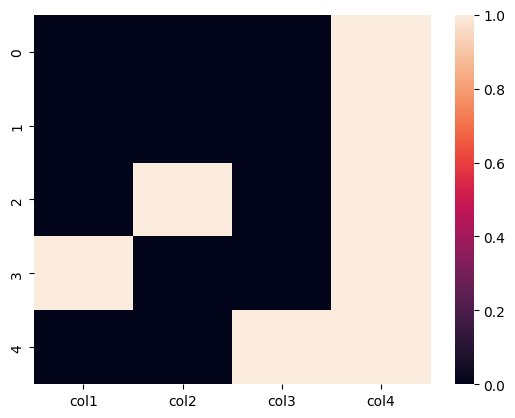

In [28]:
# visualise missing data
import seaborn as sns
import matplotlib as plt

sns.heatmap(df.isnull()) #can flip this with .isnull()

In [29]:
df[(df['col1'].notnull() ) &
   (df['col2'].notnull())]

,col1,col2,col3,col4
0,1.0,100.0,-1.0,NaN
1,2.0,200.0,-2.0,NaN
4,5.0,500.0,NaN,NaN


In [30]:
df1 = df.copy() # creating a copy of the dataframe

df1 = df1.fillna(999)
df1

,col1,col2,col3,col4
0,1.0,100.0,-1.0,999.0
1,2.0,200.0,-2.0,999.0
2,3.0,999.0,-3.0,999.0
3,999.0,400.0,-4.0,999.0
4,5.0,500.0,999.0,999.0


In [31]:
df1

,col1,col2,col3,col4
0,1.0,100.0,-1.0,999.0
1,2.0,200.0,-2.0,999.0
2,3.0,999.0,-3.0,999.0
3,999.0,400.0,-4.0,999.0
4,5.0,500.0,999.0,999.0


In [32]:
df1 = df.copy()

df1
#ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.
#df1.fillna(method='bfill') # method = 'ffill'

,col1,col2,col3,col4
0,1.0,100.0,-1.0,NaN
1,2.0,200.0,-2.0,NaN
2,3.0,NaN,-3.0,NaN
3,NaN,400.0,-4.0,NaN
4,5.0,500.0,NaN,NaN


In [33]:
df1.fillna(method='ffill') # method = 'ffill' get from previous row

,col1,col2,col3,col4
0,1.0,100.0,-1.0,NaN
1,2.0,200.0,-2.0,NaN
2,3.0,200.0,-3.0,NaN
3,3.0,400.0,-4.0,NaN
4,5.0,500.0,-4.0,NaN


In [34]:
df1 = df.copy()
df1.fillna(999,inplace=True) #inplace=True store forever, inplace=False
df1

,col1,col2,col3,col4
0,1.0,100.0,-1.0,999.0
1,2.0,200.0,-2.0,999.0
2,3.0,999.0,-3.0,999.0
3,999.0,400.0,-4.0,999.0
4,5.0,500.0,999.0,999.0


In [35]:
df1 = df.copy()
df1 = df1.interpolate(method='linear')
df1

,col1,col2,col3,col4
0,1.0,100.0,-1.0,NaN
1,2.0,200.0,-2.0,NaN
2,3.0,300.0,-3.0,NaN
3,4.0,400.0,-4.0,NaN
4,5.0,500.0,-4.0,NaN


# Pandas Join functions

In [36]:
dict1 = {'col1': [1,2,3,4,5],
         'col2': ['a','b','c','d','e']}

dict2 = {'col1': [20,30,40,50,60],
         'col2': ['b','c','d','e','f']}

df1 = pd.DataFrame(dict1)

df2 = pd.DataFrame(dict2)

In [37]:
df2

,col1,col2
0,20,b
1,30,c
2,40,d
3,50,e
4,60,f


In [38]:
df1

,col1,col2
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [39]:
left_merge = pd.merge(df1,df2, how='left', on='col2')
left_merge

,col1_x,col2,col1_y
0,1,a,NaN
1,2,b,20.0
2,3,c,30.0
3,4,d,40.0
4,5,e,50.0


In [40]:
right_merge = pd.merge(df1,df2,how='right',on='col2')
right_merge

,col1_x,col2,col1_y
0,2.0,b,20
1,3.0,c,30
2,4.0,d,40
3,5.0,e,50
4,NaN,f,60


In [41]:
inner1 = pd.merge(df1,df2,how='inner',on='col2')
inner1

,col1_x,col2,col1_y
0,2,b,20
1,3,c,30
2,4,d,40
3,5,e,50


In [42]:
outer1 = pd.merge(df1,df2,how='outer',on='col2')
outer1

,col1_x,col2,col1_y
0,1.0,a,NaN
1,2.0,b,20.0
2,3.0,c,30.0
3,4.0,d,40.0
4,5.0,e,50.0
5,NaN,f,60.0


In [43]:
# concatenate
concat1 = pd.concat([df1,df2], keys=['AAA', 'BBB'])
concat1

col1 col2
AAA 0     1    a
    1     2    b
    2     3    c
    3     4    d
    4     5    e
BBB 0    20    b
    1    30    c
    2    40    d
    3    50    e
    4    60    f

In [44]:
concat1 = pd.concat([df1,df2],axis=1, join='inner')
concat1

,col1,col2,col1,col2
0,1,a,20,b
1,2,b,30,c
2,3,c,40,d
3,4,d,50,e
4,5,e,60,f


# Other functions

In [45]:
dict1 = {'class': ['Red','Green','Blue'],
         'student': [['a','b'],['c','d'],['c','d']]}

df = pd.DataFrame(dict1)
df

,class,student
0,Red,"[a, b]"
1,Green,"[c, d]"
2,Blue,"[c, d]"


In [46]:
df.explode('student').reset_index()

,index,class,student
0,0,Red,a
1,0,Red,b
2,1,Green,c
3,1,Green,d
4,2,Blue,c
5,2,Blue,d


In [47]:
# Write to a file

# syntax : dataframe. to_csv (filepath)

write1 = df1.to_csv('./write1.csv')

In [48]:
# reading url link
# sep = ';' means data is separated by ;
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv", sep=',')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 242, saw 2
